In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

In [56]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)
print('Train labels : ',train_labels)

In [ ]:
print(train_images[1])

In [ ]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])

In [57]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [58]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model 


In [59]:
model = select_model(3)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [60]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [61]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2111 - accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0584 - accuracy: 0.9821
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0480 - accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0398 - accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0351 - accuracy: 0.9898


In [62]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0389 - accuracy: 0.9873

Test loss :  0.03892849385738373
Test accuracy : 0.9872999787330627


In [63]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [64]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [65]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

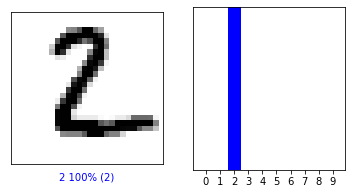

In [66]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

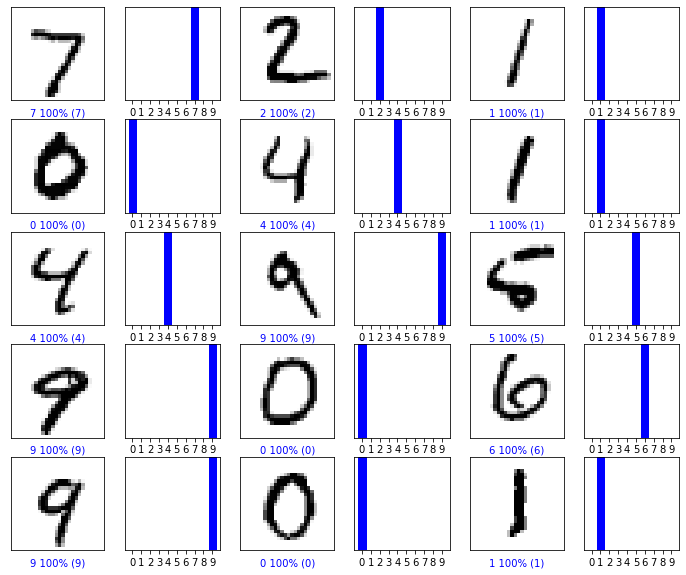

In [67]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [68]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [69]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[95, 151, 247, 321, 340, 449, 582, 591, 659, 810]


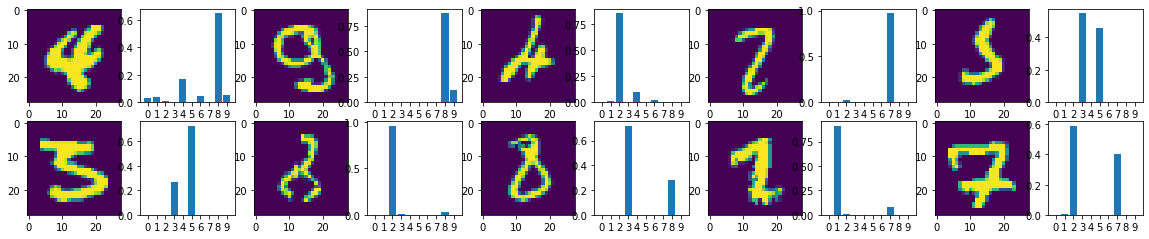

In [71]:
plot_error(index_slice, pred, test_labels)